# Introduction to Linear Regression

Downloaded and adapted from [NbViewer](http://nbviewer.ipython.org/github/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb)

*Adapted from Chapter 3 of [An Introduction to Statistical Learning](https://www.statlearning.com/)*

## Libraries

[statsmodels](http://statsmodels.sourceforge.net/) : basic tools in statistics

[pandas](http://pandas.pydata.org) : tools for real database analysis

[matplotlib](http://matplotlib.org) : best visualization library

[scikit-learn](http://scikit-learn.org/stable/) : most used library in machine learning

In [27]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# this allows plots to appear directly in the notebook
%matplotlib inline
#figsize = (16,8)
figsize = (8,5)

## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [5]:
# read data into a DataFrame
data = pd.read_csv('https://www.statlearning.com/s/Advertising.csv/Advertising.csv', index_col=0)
data.head()
#data[199:200]

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- **TV**: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio**: advertising dollars spent on Radio
- **Newspaper**: advertising dollars spent on Newspaper

What is the **response**?
- **Sales**: sales of a single product in a given market (in thousands of widgets)

In [6]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

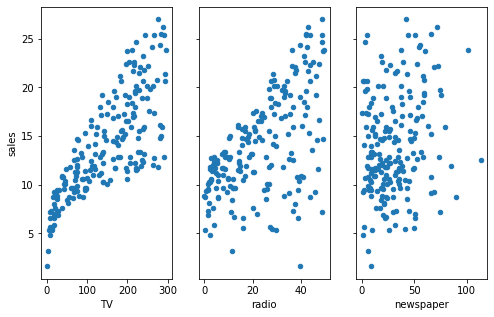

In [9]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize= figsize)
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific **questions**:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## Simple Linear Regression "Sales" régréssé contre "TV"

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). The model takes the following form:

$$\boxed{Y = \beta_0 + \beta_1X + \xi}$$

What does each term represent?
- $Y$ is the response
- $X$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $X$

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To answer the questions, we must "estimate" (or "learn") the values of these coefficients. And once we've learned these coefficients, we can use them to predict Sales!

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are to find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

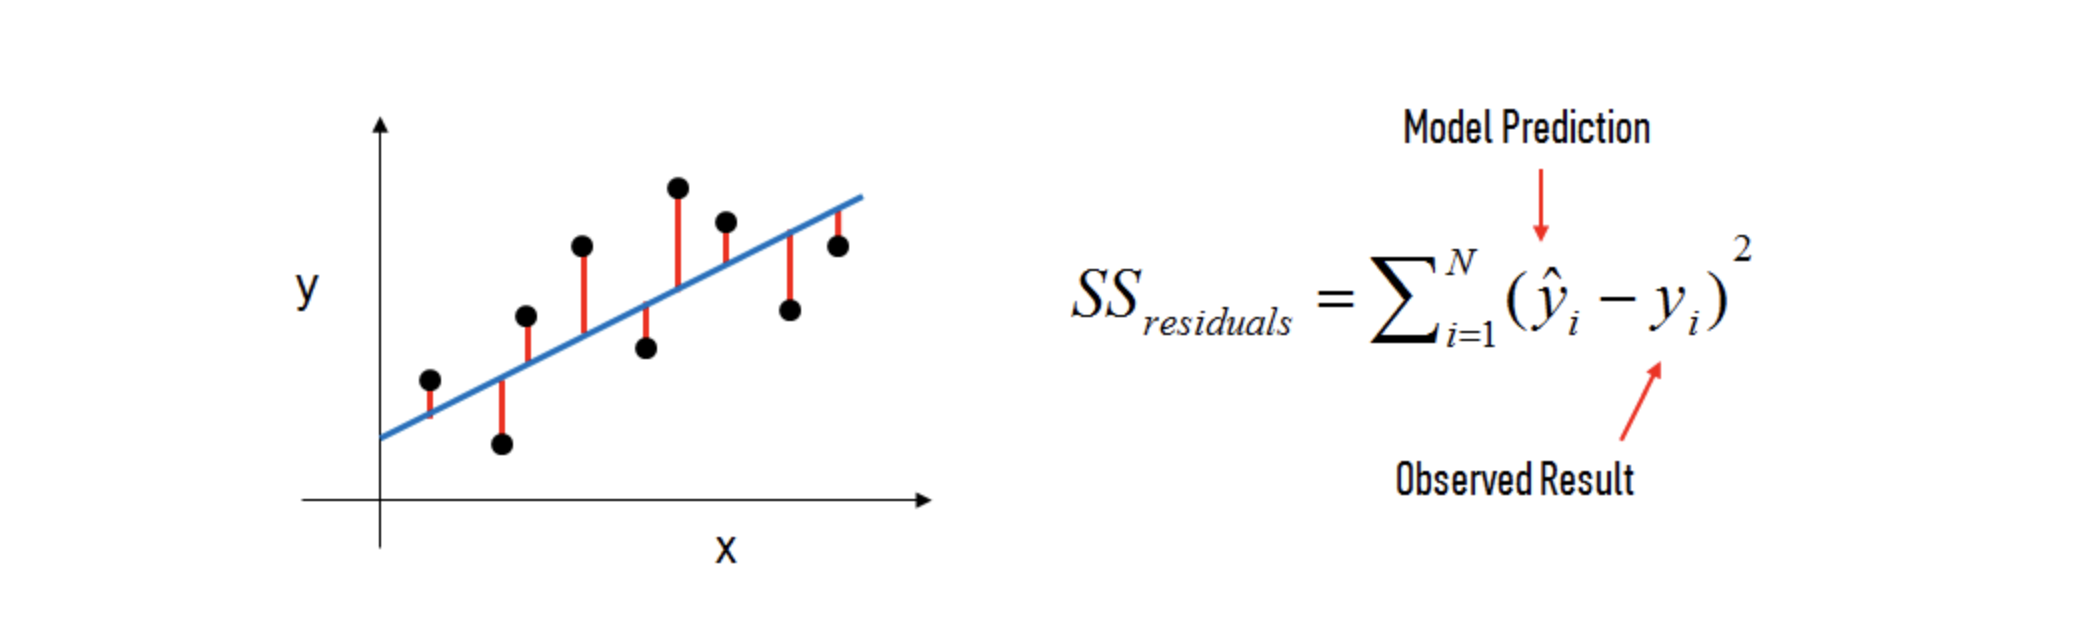

In [11]:
from IPython.display import Image
Image("08_estimating_coefficients.png")
#<img src="08_estimating_coefficients.png">
#<img src="8_estimating_coefficients.png" width=60 height=60 />

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\hat\beta_0$ is an estimator of the **intercept** $\beta_0$
- $\hat\beta_1$ is an estimator of the **slope** (coefficient of $x$) $\beta_1$

Predictions at the points of the design are
$$\hat y_i = \hat\beta_0 + \hat\beta_1 X_i$$

Let's use **Statsmodels** to estimate the model coefficients for the advertising data:

In [13]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='sales ~ TV', data=data).fit()

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

## Interpreting Model Coefficients

How do we interpret the TV coefficient $\beta_1$?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47 widgets.

(Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**)

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$\hat y = \hat\beta_0 + \hat\beta_1x$$
$$\hat y = 7.032594 + 0.047537 \times 50$$

In [14]:
# manually calculate the prediction
sales = 1000*(7.032594 + 0.047537*50)
print("expected Sales = {} widgets".format(sales))

expected Sales = 9409.444000000001 widgets


In [15]:
# use the model to make predictions on a new value
X_new = pd.DataFrame({'TV' : [50]})
lm.predict(X_new)

0    9.409426
dtype: float64

## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

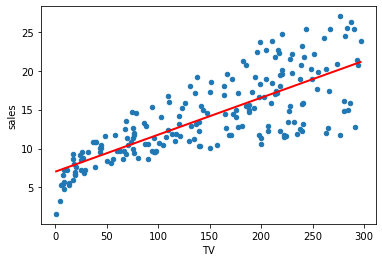

In [16]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
#X_new.head()
# make predictions for those x values and store them
preds = lm.predict(X_new)
#preds
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

## Confidence intervals

Statsmodels calculates 95% confidence intervals on the  model coefficients. It means that if we assume that the model $Y=\beta_0+\beta_1 X +\xi$ holds then with probability tending to 95%,  the "true" coefficients $\beta_0$ and $\beta_1$ belong to these intervals.

In [ ]:
# print the confidence intervals for the model coefficients
lm.conf_int()

## Hypothesis Testing and p-values

We want to study the following test problem:
- **null hypothesis:** There is no relationship between TV ads and Sales  $$H_0 : \beta_1 = 0$$
- **alternative hypothesis:** There is a relationship between TV ads and Sales $$H_1 : \beta_1\neq0$$

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [ ]:
# print the p-values for the model coefficients
lm.pvalues

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we have a high confidence in rejecting ($H_0$). As a consequence, we highly believe that there is a strong connection between TV ads and Sales.

(Note that we generally ignore the p-value for the intercept).

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

$$R^2=\frac{\|\hat y - \bar{Y}_n\|_2^2}{\|Y-\bar{Y}_n\|_2^2}$$
where $\hat y$ is the prediction vector via least squares.

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

<img src="08_r_squared.png">

You can see that the **blue line** explains some of the variance in the data (R-squared=0.54), the **green line** explains more of the variance (R-squared=0.64), and the **red line** fits the training data even further (R-squared=0.66). (Does the red line look like it's overfitting?)

Let's calculate the R-squared value for our simple linear model:

In [17]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$$Y = \beta_0 + \beta_1X^{(1)} + ... + \beta_n X^{(k)} + \xi$$

Each $X^{(j)}$ represents a different feature ( = coordinates of the design $X=(X^{(1)}, \ldots, X^{(k)})$, and each feature has its own coefficient. In this case:

$$\boxed{Y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper +\xi}$$

Let's use Statsmodels to estimate these coefficients:

In [19]:
# create a fitted model with all three features
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 widgets**.

A lot of the information we have been reviewing piece-by-piece is available in the model summary output:

In [20]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           1.58e-96
Time:                        10:48:54   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Feature Selection

How do I decide **which features to include** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new predictors.

What are the **drawbacks** to this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [21]:
# only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared

0.8971942610828957

In [22]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

So is there a better approach to feature selection? **Cross-validation.** It provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

In [32]:
# print a summary of the fitted model that includes only TV and Radio in the model
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           4.83e-98
Time:                        10:57:47   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear Regression in scikit-learn

Let's redo some of the Statsmodels code above in scikit-learn:

In [24]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [25]:
# pair the feature names with the coefficients
zip(feature_cols, lm.coef_)

In [29]:
# predict for a new observation
lm.predict(np.array([[100, 25, 25]]))

array([12.20266701])

In [30]:
# calculate the R-squared
lm.score(X, y)

0.8972106381789522

Note that **p-values** and **confidence intervals** are not (easily) accessible through scikit-learn.